In [44]:
import pandas as pd
import numpy as np
import datetime
#import pandas_profiling # pip install pandas_profiling

taxiCancellationScore = pd.read_csv('Kaggle_YourCabs_score.csv')
taxiCancellationTraining = pd.read_csv('Kaggle_YourCabs_training.csv')

In [70]:
#taxiCancellationScore.Profile_Report()

In [71]:
taxiCancellationTraining.shape

(43431, 20)

In [72]:
taxiCancellationTraining

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0,1.0
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,41275.40625,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0,1.0
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0,1.0
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0,1.0
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0,1.0


### Drop 9138 rows, Drop from_city_id, Drop row from_lat

In [73]:
taxiCancellationTraining.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

## Addressing Time

In [74]:
#convert try 2
from_weekdate_test = [] #days of week
from_time_test = []
for x in taxiCancellationScore['from_date']:
    if type(x) is str:
        ziz = x.split(' ')
        day = ziz[0].split('/')
        for z in range(len(day)):
            day[z] = int(day[z])
        from_weekdate_test.append(datetime.date(day[2], day[0], day[1]).weekday())
        #from_weekdate is now ints as day of week, 0=sunday etc

        time = ziz[1].split(':')
        from_time_test.append(int(time[0])*60 + int(time[1]))
        #from_time is now ints as minute of day
        
        
booking_weekdate_test = [] #days of week
booking_time_test = []
for x in taxiCancellationScore['booking_created']:
    if type(x) is str:
        ziz = x.split(' ')
        day = ziz[0].split('/')
        for z in range(len(day)):
            day[z] = int(day[z])
        booking_weekdate_test.append(datetime.date(day[2], day[0], day[1]).weekday())
        #booking_weekdate is now ints as day of week, 0=sunday etc

        time = ziz[1].split(':')
        booking_time_test.append(int(time[0])*60 + int(time[1]))
        #booking_time is now ints as minute of day
        
#to be appended: from_weekdate, from_time, booking_weekdate, booking_time

In [75]:
#convert try 2
from_weekdate = [] #days of week
from_time = []
for x in taxiCancellationTraining['from_date']:
    if type(x) is str:
        ziz = x.split(' ')
        day = ziz[0].split('/')
        for z in range(len(day)):
            day[z] = int(day[z])
        from_weekdate.append(datetime.date(day[2], day[0], day[1]).weekday())
        #from_weekdate is now ints as day of week, 0=sunday etc

        time = ziz[1].split(':')
        from_time.append(int(time[0])*60 + int(time[1]))
        #from_time is now ints as minute of day
        
        
booking_weekdate = [] #days of week
booking_time = []
for x in taxiCancellationTraining['booking_created']:
    if type(x) is str:
        ziz = x.split(' ')
        day = ziz[0].split('/')
        for z in range(len(day)):
            day[z] = int(day[z])
        booking_weekdate.append(datetime.date(day[2], day[0], day[1]).weekday())
        #booking_weekdate is now ints as day of week, 0=sunday etc

        time = ziz[1].split(':')
        booking_time.append(int(time[0])*60 + int(time[1]))
        #booking_time is now ints as minute of day
        
#to be appended: from_weekdate, from_time, booking_weekdate, booking_time

In [76]:
date_df = pd.DataFrame({'from_weekdate':from_weekdate,'from_time':from_time,'booking_weekdate':booking_weekdate,'booking_time':booking_time})
new_taxiCancellationTraining = taxiCancellationTraining.join(date_df)

## Addressing Null values

In [77]:
new_taxiCancellationTraining.dropna(subset=['to_area_id', 'to_lat', 'to_long', ], inplace = True)

In [78]:
new_taxiCancellationTraining.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34293
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34293
from_date                  0
to_date                15186
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
Cost_of_error              0
from_weekdate              0
from_time                  0
booking_weekdate           0
booking_time               0
dtype: int64

In [79]:
new_taxiCancellationTraining

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,from_weekdate,from_time,booking_weekdate,booking_time
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,...,12.924150,77.672290,12.927320,77.635750,0,1.0,1,120,1,99
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,...,12.966910,77.749350,12.927680,77.626640,0,1.0,1,540,1,145
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,...,12.937222,77.626915,13.047926,77.597766,0,1.0,1,210,1,188
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,...,12.989990,77.553320,12.971430,77.639140,0,1.0,1,345,1,279
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,...,12.845653,77.677925,12.954340,77.600720,0,1.0,1,540,1,473
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,...,13.028530,77.546250,12.869805,77.653211,0,1.0,1,1350,1,481
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,...,12.976770,77.572700,12.880190,77.645580,0,1.0,1,660,1,579
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,...,13.005600,77.657990,12.902450,77.660810,0,1.0,1,660,1,589
10,132523,4941,12,NaN,2,150.0,776.0,NaN,NaN,1/1/2013 11:00,...,12.897240,77.610650,13.015080,77.677960,0,1.0,1,660,1,595
11,132524,17037,12,NaN,2,455.0,1330.0,NaN,NaN,1/1/2013 12:45,...,12.999874,77.678120,12.953434,77.706510,0,1.0,1,765,1,599


In [80]:
feature_cols = ['vehicle_model_id', 'travel_type_id',
                'from_area_id', 'to_area_id', 
       'online_booking', 'mobile_site_booking',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'from_weekdate','from_time','booking_weekdate','booking_time']

In [81]:
X = new_taxiCancellationTraining.loc[:,feature_cols] # Features
y = new_taxiCancellationTraining.loc[:,'Car_Cancellation'] # Target variable
X.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
online_booking         0
mobile_site_booking    0
from_lat               0
from_long              0
to_lat                 0
to_long                0
from_weekdate          0
from_time              0
booking_weekdate       0
booking_time           0
dtype: int64

In [82]:
X.shape
#34k rows

(34293, 14)

# Problem with dataset

In [83]:
#modify training dataframe so that data is 50-50 split of correct/incorrect
from sklearn.model_selection import train_test_split

zizzle = [] #cancellation = 0
sizzle = [] #cancellation = 1

for row in new_taxiCancellationTraining.itertuples():
    if row.Car_Cancellation is 0:
        ziz = list(row)
        zizzle.append(ziz[1:])
    elif row.Car_Cancellation is 1:
        siz = list(row)
        sizzle.append(siz[1:])
drizzle, discard = train_test_split(zizzle, test_size = .9,random_state = 1)
#drizzle = 10% of non-cancelled test data
foshizzle = drizzle + sizzle #~3k cancelled + ~3k non-cancelled

TempNonCancelledTrain = pd.DataFrame(foshizzle, columns = new_taxiCancellationTraining.columns)
print(TempNonCancelledTrain.shape)

new_taxiCancellationTraining = TempNonCancelledTrain

(5926, 24)


In [84]:
X = new_taxiCancellationTraining.loc[:,feature_cols] # Features
y = new_taxiCancellationTraining.loc[:,'Car_Cancellation'] # Target variable
X.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
online_booking         0
mobile_site_booking    0
from_lat               0
from_long              0
to_lat                 0
to_long                0
from_weekdate          0
from_time              0
booking_weekdate       0
booking_time           0
dtype: int64

# ONLY 3,132 taxi orders were cancelled, 40,299 ON TRAINING Dataset

In [85]:
## Non cancellation 
nines=taxiCancellationTraining.loc[:,'Car_Cancellation'].values
np.count_nonzero(nines) , nines.shape[0]-np.count_nonzero(nines)


(3132, 40299)

## train_test_split

date_df_test = pd.DataFrame({'from_weekdate':from_weekdate_test,'from_time':from_time_test,'booking_weekdate':booking_weekdate_test,'booking_time':booking_time_test})
new_taxiCancellationScore =taxiCancellationScore.join(date_df_test)

new_taxiCancellationScore.dropna(subset=['to_area_id', 'to_lat', 'to_long', ], inplace = True)
X_test = new_taxiCancellationScore.loc[:,feature_cols] # Features
X_test.isnull().sum()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.30, random_state = 1)

## 4 Models

In [87]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Logistic Regresstion

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

C:\Files\zAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#Deep Learning Keras Model
#relu -linear
#sigmoid function for final layer
#Dropout 50%
#Dimension input features column
#Output binary classification 0 and 1
model = Sequential()
model.add(Dense(124, activation='relu', input_dim = X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
#Using binary_crossentropy
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 124)               1860      
_________________________________________________________________
dropout_13 (Dropout)         (None, 124)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8000      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [89]:
#KNN
n_neigh = 3
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neigh)
neighbor.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [90]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Prediction

In [121]:
model.fit(X_train,y_train, epochs=20, batch_size = 5, verbose = 1)

Epoch 1/20
24005/24005 [==============================] - 24s 1ms/step - loss: 3.3083 - accuracy: 0.8836
Epoch 2/20
24005/24005 [==============================] - 23s 979us/step - loss: 0.3074 - accuracy: 0.9172
Epoch 3/20
24005/24005 [==============================] - 23s 976us/step - loss: 0.2944 - accuracy: 0.9180
Epoch 4/20
24005/24005 [==============================] - 24s 999us/step - loss: 0.2909 - accuracy: 0.9180
Epoch 5/20
24005/24005 [==============================] - 25s 1ms/step - loss: 0.2988 - accuracy: 0.9182
Epoch 6/20
24005/24005 [==============================] - 25s 1ms/step - loss: 0.2876 - accuracy: 0.9183
Epoch 7/20
24005/24005 [==============================] - 26s 1ms/step - loss: 0.2872 - accuracy: 0.9183
Epoch 8/20
24005/24005 [==============================] - 25s 1ms/step - loss: 0.2910 - accuracy: 0.9181
Epoch 9/20
24005/24005 [==============================] - 26s 1ms/step - loss: 0.2869 - accuracy: 0.9182
Epoch 10/20
24005/24005 [========================

In [122]:
model.save('trained_model.h5')

In [123]:
X_test.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
online_booking         0
mobile_site_booking    0
from_lat               0
from_long              0
to_lat                 0
to_long                0
from_weekdate          0
from_time              0
booking_weekdate       0
booking_time           0
dtype: int64

In [91]:
y_pred_logreg = logreg.predict(X_test)
y_pred_keras= model.predict(X_test)
y_pred_neigh= neighbor.predict(X_test)
y_pred_gaus= gaus.predict(X_test)
y_pred_keras= y_pred_keras.argmax(axis=1)

# Performance of Each Model

In [188]:

y_pred_four = pd.DataFrame({'Logistic': [np.count_nonzero(y_pred_logreg),y_pred_logreg.shape[0]-np.count_nonzero(y_pred_logreg)], 'Keras':[np.count_nonzero(y_pred_keras),y_pred_keras.shape[0]-np.count_nonzero(y_pred_keras)], 'Neighbor':[np.count_nonzero(y_pred_neigh),y_pred_neigh.shape[0]-np.count_nonzero(y_pred_neigh)],'Naive':[np.count_nonzero(y_pred_gaus),y_pred_gaus.shape[0]-np.count_nonzero(y_pred_gaus)]})
y_pred_four

,Logistic,Keras,Neighbor,Naive
0,0,0,375,410
1,10288,10288,9913,9878


In [181]:
from sklearn.metrics import accuracy_score
logreg_acc= accuracy_score(y_test, y_pred_logreg)
keras_acc =accuracy_score(y_test, y_pred_keras)
neigh_acc = accuracy_score(y_test, y_pred_neigh)
gaus_acc = accuracy_score(y_test, y_pred_gaus)
accuracy_four = np.array({'Logistic': logreg_acc, 'Keras':keras_acc, 'Neighbor':neigh_acc,'Naive':gaus_acc})
accuracy_four

array({'Logistic': 0.9201982892690513, 'Keras': 0.9201982892690513, 'Neighbor': 0.9068818040435459, 'Naive': 0.8972589424572317},
      dtype=object)

# visualization

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
from sklearn import metrics
import numpy as np

cnf_matrixlogreg = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrixkeras = metrics.confusion_matrix(y_test, y_pred_keras)
cnf_matrixneigh = metrics.confusion_matrix(y_test, y_pred_neigh)
cnf_matrixgaus = metrics.confusion_matrix(y_test, y_pred_gaus)

Text(0.5, 257.44, 'Predicted label')

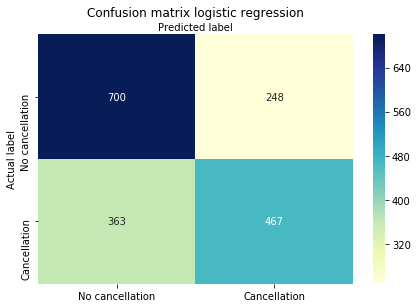

In [95]:
class_names=['No cancellation','Cancellation'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrixlogreg, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

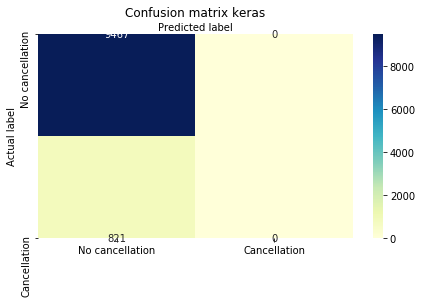

In [162]:
class_names=['No cancellation','Cancellation'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrixkeras, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix keras')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

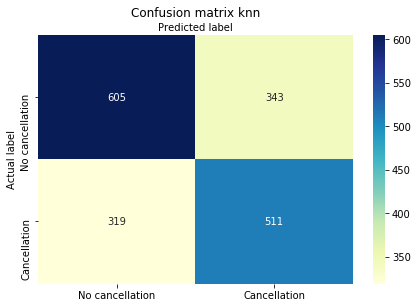

In [96]:
class_names=['No cancellation','Cancellation'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrixneigh, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix knn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

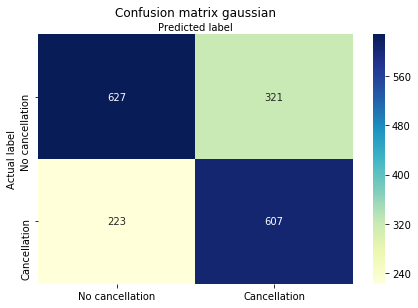

In [97]:
class_names=['No cancellation','Cancellation'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrixgaus, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix gaussian')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')